# Data Glacier Internship Final Project - Data Cleansing and Transformation Pipeline 1

# Connect to Google Drive

Mount GDrive

In [1]:
from google.colab import drive
drive.mount('/content/GDrive')

Mounted at /content/GDrive


Move to the Target Directory by using the Copied Path

In [8]:
%cd /content/

/content


List the Files present into the Current Directory

In [9]:
!ls

GDrive	sample_data


Upload local files into GDrive

In [ ]:
from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving Dataset_DA.xlsx to Dataset_DA.xlsx
User uploaded file "Dataset_DA.xlsx" with length 726655 bytes


# EDA Verson 1

Import Necessary Libraries

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
from matplotlib.pyplot import figure

## Import and Prepare Dataset

In [11]:
!gdown --id 1-2sq9vZ7f3cttweyhq8_EEBWpG1VC3nz

Downloading...
From: https://drive.google.com/uc?id=1-2sq9vZ7f3cttweyhq8_EEBWpG1VC3nz
To: /content/Healthcare_dataset.xlsx
100% 920k/920k [00:00<00:00, 58.2MB/s]


In [16]:
%cd /content/
pd.set_option('display.max_columns', None)
df = pd.read_excel("Healthcare_dataset.xlsx", sheet_name = "Dataset")
df.head()

/content


,Ptid,Persistency_Flag,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,Gluco_Record_Prior_Ntm,Gluco_Record_During_Rx,Dexa_Freq_During_Rx,Dexa_During_Rx,Frag_Frac_Prior_Ntm,Frag_Frac_During_Rx,Risk_Segment_Prior_Ntm,Tscore_Bucket_Prior_Ntm,Risk_Segment_During_Rx,Tscore_Bucket_During_Rx,Change_T_Score,Change_Risk_Segment,Adherent_Flag,Idn_Indicator,Injectable_Experience_During_Rx,Comorb_Encounter_For_Screening_For_Malignant_Neoplasms,Comorb_Encounter_For_Immunization,"Comorb_Encntr_For_General_Exam_W_O_Complaint,_Susp_Or_Reprtd_Dx",Comorb_Vitamin_D_Deficiency,Comorb_Other_Joint_Disorder_Not_Elsewhere_Classified,Comorb_Encntr_For_Oth_Sp_Exam_W_O_Complaint_Suspected_Or_Reprtd_Dx,Comorb_Long_Term_Current_Drug_Therapy,Comorb_Dorsalgia,Comorb_Personal_History_Of_Other_Diseases_And_Conditions,Comorb_Other_Disorders_Of_Bone_Density_And_Structure,Comorb_Disorders_of_lipoprotein_metabolism_and_other_lipidemias,Comorb_Osteoporosis_without_current_pathological_fracture,Comorb_Personal_history_of_malignant_neoplasm,Comorb_Gastro_esophageal_reflux_disease,Concom_Cholesterol_And_Triglyceride_Regulating_Preparations,Concom_Narcotics,Concom_Systemic_Corticosteroids_Plain,Concom_Anti_Depressants_And_Mood_Stabilisers,Concom_Fluoroquinolones,Concom_Cephalosporins,Concom_Macrolides_And_Similar_Types,Concom_Broad_Spectrum_Penicillins,Concom_Anaesthetics_General,Concom_Viral_Vaccines,Risk_Type_1_Insulin_Dependent_Diabetes,Risk_Osteogenesis_Imperfecta,Risk_Rheumatoid_Arthritis,Risk_Untreated_Chronic_Hyperthyroidism,Risk_Untreated_Chronic_Hypogonadism,Risk_Untreated_Early_Menopause,Risk_Patient_Parent_Fractured_Their_Hip,Risk_Smoking_Tobacco,Risk_Chronic_Malnutrition_Or_Malabsorption,Risk_Chronic_Liver_Disease,Risk_Family_History_Of_Osteoporosis,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls,Count_Of_Risks
0,P1,Persistent,Male,Caucasian,Not Hispanic,West,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,N,N,0,N,N,N,VLR_LR,>-2.5,VLR_LR,<=-2.5,No change,Unknown,Adherent,N,Y,N,Y,Y,N,N,Y,N,Y,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,0
1,P2,Non-Persistent,Male,Asian,Not Hispanic,West,55-65,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,N,N,0,N,N,N,VLR_LR,>-2.5,Unknown,Unknown,Unknown,Unknown,Adherent,N,Y,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,0
2,P3,Non-Persistent,Female,Other/Unknown,Hispanic,Midwest,65-75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,N,N,0,N,N,N,HR_VHR,<=-2.5,HR_VHR,<=-2.5,No change,No change,Adherent,N,Y,Y,N,Y,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,Y,N,N,N,N,N,N,N,2
3,P4,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,N,Y,0,N,N,N,HR_VHR,>-2.5,HR_VHR,<=-2.5,No change,No change,Adherent,N,Y,N,Y,Y,N,Y,N,N,Y,N,N,Y,N,N,Y,N,Y,Y,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,1
4,P5,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,Y,Y,0,N,N,N,HR_VHR,<=-2.5,Unknown,Unknown,Unknown,Unknown,Adherent,N,Y,Y,Y,Y,N,N,N,N,Y,Y,N,N,N,N,N,N,Y,Y,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,1


Drop Patient ID Column

In [17]:
df.drop(columns = ['Ptid'],inplace= True)
df.head()

,Persistency_Flag,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,Gluco_Record_Prior_Ntm,Gluco_Record_During_Rx,Dexa_Freq_During_Rx,Dexa_During_Rx,Frag_Frac_Prior_Ntm,Frag_Frac_During_Rx,Risk_Segment_Prior_Ntm,Tscore_Bucket_Prior_Ntm,Risk_Segment_During_Rx,Tscore_Bucket_During_Rx,Change_T_Score,Change_Risk_Segment,Adherent_Flag,Idn_Indicator,Injectable_Experience_During_Rx,Comorb_Encounter_For_Screening_For_Malignant_Neoplasms,Comorb_Encounter_For_Immunization,"Comorb_Encntr_For_General_Exam_W_O_Complaint,_Susp_Or_Reprtd_Dx",Comorb_Vitamin_D_Deficiency,Comorb_Other_Joint_Disorder_Not_Elsewhere_Classified,Comorb_Encntr_For_Oth_Sp_Exam_W_O_Complaint_Suspected_Or_Reprtd_Dx,Comorb_Long_Term_Current_Drug_Therapy,Comorb_Dorsalgia,Comorb_Personal_History_Of_Other_Diseases_And_Conditions,Comorb_Other_Disorders_Of_Bone_Density_And_Structure,Comorb_Disorders_of_lipoprotein_metabolism_and_other_lipidemias,Comorb_Osteoporosis_without_current_pathological_fracture,Comorb_Personal_history_of_malignant_neoplasm,Comorb_Gastro_esophageal_reflux_disease,Concom_Cholesterol_And_Triglyceride_Regulating_Preparations,Concom_Narcotics,Concom_Systemic_Corticosteroids_Plain,Concom_Anti_Depressants_And_Mood_Stabilisers,Concom_Fluoroquinolones,Concom_Cephalosporins,Concom_Macrolides_And_Similar_Types,Concom_Broad_Spectrum_Penicillins,Concom_Anaesthetics_General,Concom_Viral_Vaccines,Risk_Type_1_Insulin_Dependent_Diabetes,Risk_Osteogenesis_Imperfecta,Risk_Rheumatoid_Arthritis,Risk_Untreated_Chronic_Hyperthyroidism,Risk_Untreated_Chronic_Hypogonadism,Risk_Untreated_Early_Menopause,Risk_Patient_Parent_Fractured_Their_Hip,Risk_Smoking_Tobacco,Risk_Chronic_Malnutrition_Or_Malabsorption,Risk_Chronic_Liver_Disease,Risk_Family_History_Of_Osteoporosis,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls,Count_Of_Risks
0,Persistent,Male,Caucasian,Not Hispanic,West,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,N,N,0,N,N,N,VLR_LR,>-2.5,VLR_LR,<=-2.5,No change,Unknown,Adherent,N,Y,N,Y,Y,N,N,Y,N,Y,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,0
1,Non-Persistent,Male,Asian,Not Hispanic,West,55-65,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,N,N,0,N,N,N,VLR_LR,>-2.5,Unknown,Unknown,Unknown,Unknown,Adherent,N,Y,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,0
2,Non-Persistent,Female,Other/Unknown,Hispanic,Midwest,65-75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,N,N,0,N,N,N,HR_VHR,<=-2.5,HR_VHR,<=-2.5,No change,No change,Adherent,N,Y,Y,N,Y,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,Y,N,N,N,N,N,N,N,2
3,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,N,Y,0,N,N,N,HR_VHR,>-2.5,HR_VHR,<=-2.5,No change,No change,Adherent,N,Y,N,Y,Y,N,Y,N,N,Y,N,N,Y,N,N,Y,N,Y,Y,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,1
4,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,Y,Y,0,N,N,N,HR_VHR,<=-2.5,Unknown,Unknown,Unknown,Unknown,Adherent,N,Y,Y,Y,Y,N,N,N,N,Y,Y,N,N,N,N,N,N,Y,Y,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,1


Print the details of the Dataset

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3424 entries, 0 to 3423
Data columns (total 68 columns):
 #   Column                                                              Non-Null Count  Dtype 
---  ------                                                              --------------  ----- 
 0   Persistency_Flag                                                    3424 non-null   object
 1   Gender                                                              3424 non-null   object
 2   Race                                                                3424 non-null   object
 3   Ethnicity                                                           3424 non-null   object
 4   Region                                                              3424 non-null   object
 5   Age_Bucket                                                          3424 non-null   object
 6   Ntm_Speciality                                                      3424 non-null   object
 7   Ntm_Specialist_Flag     

Describe Dataset

In [19]:
df.describe()

,Dexa_Freq_During_Rx,Count_Of_Risks
count,3424.000000,3424.000000
mean,3.016063,1.239486
std,8.136545,1.094914
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,1.000000
75%,3.000000,2.000000
max,146.000000,7.000000


Check for NULL Values

In [20]:
# check NAN values 
pd.options.display.max_rows = 4000
df.isna().sum()

Persistency_Flag                                                      0
Gender                                                                0
Race                                                                  0
Ethnicity                                                             0
Region                                                                0
Age_Bucket                                                            0
Ntm_Speciality                                                        0
Ntm_Specialist_Flag                                                   0
Ntm_Speciality_Bucket                                                 0
Gluco_Record_Prior_Ntm                                                0
Gluco_Record_During_Rx                                                0
Dexa_Freq_During_Rx                                                   0
Dexa_During_Rx                                                        0
Frag_Frac_Prior_Ntm                                             

Print out the Uniques Variables in Each Dataset

In [21]:
# Unique per columns in the data set
print(df.apply(lambda col: col.unique()))

Persistency_Flag                                                                           [Persistent, Non-Persistent]
Gender                                                                                                   [Male, Female]
Race                                                                  [Caucasian, Asian, Other/Unknown, African Amer...
Ethnicity                                                                             [Not Hispanic, Hispanic, Unknown]
Region                                                                 [West, Midwest, South, Other/Unknown, Northeast]
Age_Bucket                                                                                     [>75, 55-65, 65-75, <55]
Ntm_Speciality                                                        [GENERAL PRACTITIONER, Unknown, ENDOCRINOLOGY,...
Ntm_Specialist_Flag                                                                                [Others, Specialist]
Ntm_Speciality_Bucket                   

Encode the Categorical Variables, Create Numerical Dummy Variables

In [22]:
# Encode the categorical columns 
# creating 2 seperate data frames to encode the categorical columns
dummy1 = pd.DataFrame()
dummy2 = pd.DataFrame()
dummy1 = df.select_dtypes(include=['object']).copy()
dummy1.drop(["Persistency_Flag"],axis=1,inplace=True) #drop Persistency_Flag, does not need encoding
dummy2 = df.select_dtypes(include=['int64']).copy()

In [23]:
df_dummy1 = pd.DataFrame()
df_dummy1 = pd.get_dummies(dummy1,drop_first=False,prefix_sep=" ")
df_dummy1

In [ ]:
df_dummy=pd.concat([df_dummy1,dummy2])
df_dummy["Persistency_Flag"] = df["Persistency_Flag"]
df_dummy.head()

## Start Descriptive Analysis on the Data 

Exploratory Data Analysis (EDA)

([<matplotlib.patches.Wedge at 0x7f45d62e5950>,
 [Text(1.0826199342373442, 0.1947667271171564, 'Male'),
  Text(-1.1810399183123503, -0.21247284850718462, 'Female')],
 [Text(0.49209997010788364, 0.08853033050779835, '5.7%'),
  Text(-0.5905199591561752, -0.10623642425359231, '94.3%')])

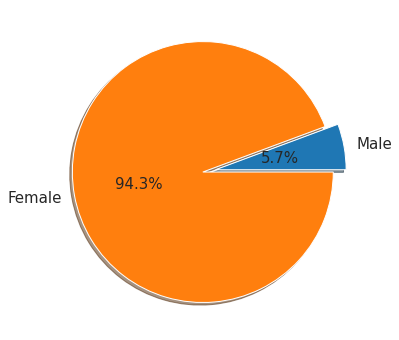

In [38]:
# checking the gender counts of the patients 
plt.rcParams['font.size'] =15
figure(figsize=(6, 6))
labels = df['Gender'].unique()
data=df['Gender'].value_counts(ascending=True)
explode = (0, 0.1)
plt.pie(x=data, autopct="%.1f%%", labels=labels,explode=explode, pctdistance=0.5,shadow=True)

Non-Persistent    2135
Persistent        1289
Name: Persistency_Flag, dtype: int64


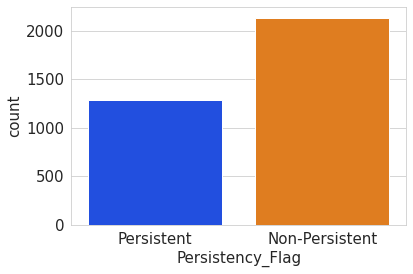

In [39]:
# checking the Persistency status counts of the patients 
sns.set_style("whitegrid")
persistency_count=df.Persistency_Flag.value_counts() 
sns.countplot(x="Persistency_Flag",data = df,palette="bright")
print(persistency_count)

Midwest          1383
South            1247
West              502
Northeast         232
Other/Unknown      60
Name: Region, dtype: int64


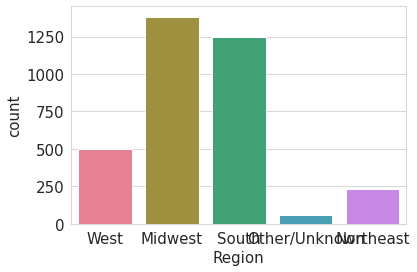

In [40]:
# checking the region of the patients 
region_count= df.Region.value_counts() 
sns.countplot(x="Region",data=df,palette="husl") 
print (region_count)

([<matplotlib.patches.Wedge at 0x7f45d6337750>,
 [Text(-1.0835020449416526, 0.18979809958810745, 'Not Hispanic'),
  Text(1.1606169052142803, -0.30490719789933857, 'Hispanic'),
  Text(1.1958196294511787, -0.10007703942086771, 'Unknown')],
 [Text(-1.8715035321719453, 0.327833081106731, '94.5%'),
  Text(1.934361508690467, -0.5081786631655643, '2.9%'),
  Text(1.9930327157519643, -0.16679506570144617, '2.7%')])

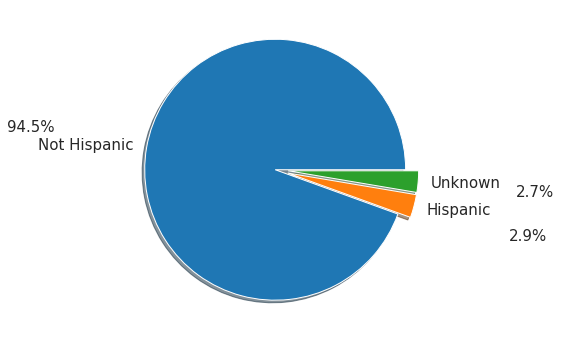

In [41]:
# checking the Ethnicity of the patients
plt.rcParams['font.size'] =15
figure(figsize=(6, 6))
labels = df['Ethnicity'].unique()
data=df['Ethnicity'].value_counts(ascending=False)
explode = (0, 0.1, 0.1) 
plt.pie(x=data, autopct="%.1f%%",explode=explode, labels=labels, pctdistance=1.9, shadow=True)

>75      1439
65-75    1086
55-65     733
<55       166
Name: Age_Bucket, dtype: int64


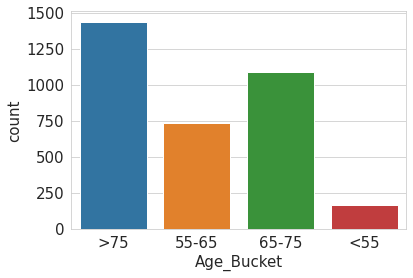

In [42]:
# checking the Age range of the patients in the study
age_count=df.Age_Bucket.value_counts() 
sns.countplot(x="Age_Bucket",data=df)
print (age_count)

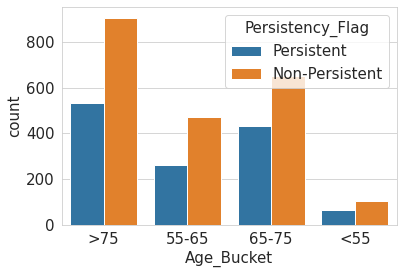

In [43]:
# checking the Age range of the patients per Persistency status 
sns.countplot(x="Age_Bucket", hue="Persistency_Flag", data=df)

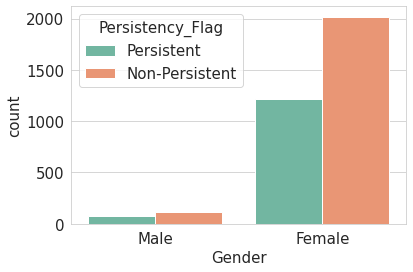

In [44]:
# checking the gender of the patients per Persistency status 
sns.countplot(x="Gender", hue="Persistency_Flag", data=df, palette="Set2")

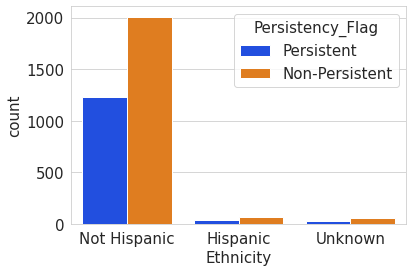

In [45]:
# checking the Ethnicity of the patients per Persistency status 
sns.countplot(x="Ethnicity", hue="Persistency_Flag", data=df, palette="bright")

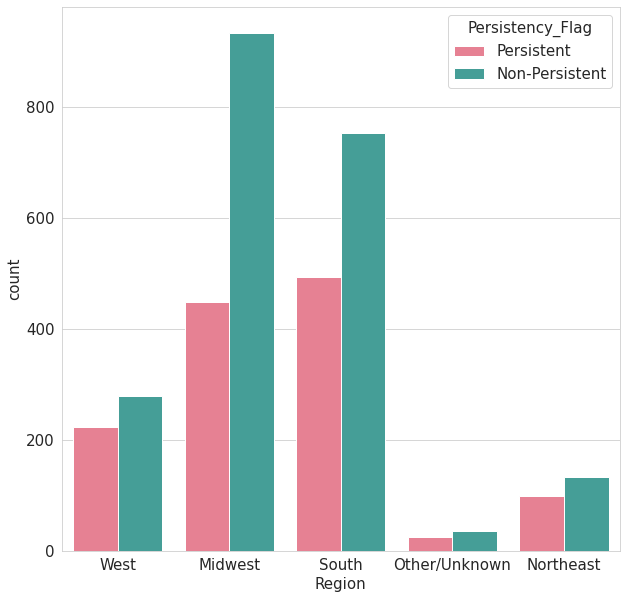

In [46]:
# checking the Region of the patients per Persistency status 
figure(figsize=(10, 10))
sns.countplot(x="Region", hue="Persistency_Flag", data=df, palette="husl")

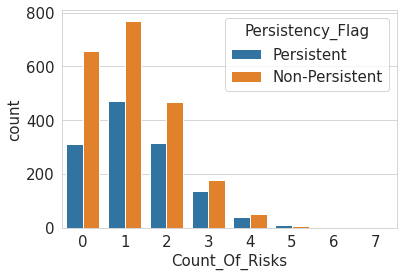

In [47]:
# checking the Region of the patients per Persistency status
sns.countplot(x="Count_Of_Risks", hue="Persistency_Flag", data=df)

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 92.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 85.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 89.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 50.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


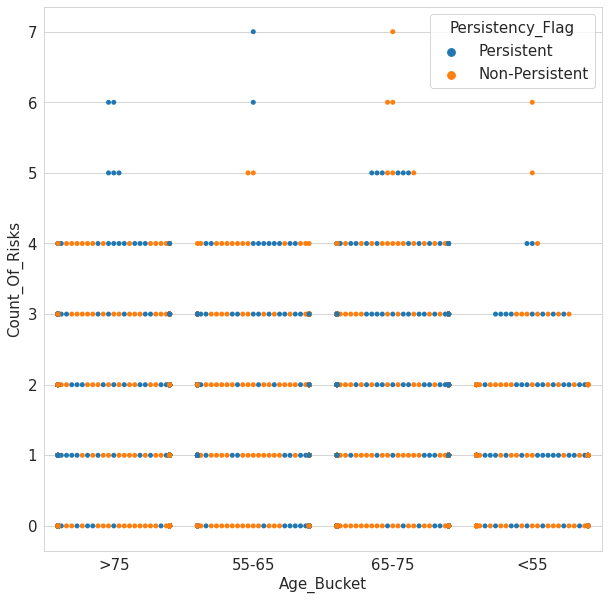

In [48]:
# checking the distribution of patients based on age and count of risk
figure(figsize=(10, 10))
sns.swarmplot(x=df["Age_Bucket"], y=df["Count_Of_Risks"], hue=df["Persistency_Flag"])

The above plots show that older patients does not nesccary mean that they are more persistent.

## Data Transformation

Correlation Analysis on the Dataset

In [36]:
# finding correlation matrix 
corr = df_dummy.corr()
# corr_threshold=(corr>0.3) & (corr!= 1)
corr_threshold=(corr>0.0001) & (corr!= 1)

In [37]:
df_corr = pd.DataFrame(data=corr)
df_corr.head(30)

,Gender Female,Gender Male,Race African American,Race Asian,Race Caucasian,Race Other/Unknown,Ethnicity Hispanic,Ethnicity Not Hispanic,Ethnicity Unknown,Region Midwest,Region Northeast,Region Other/Unknown,Region South,Region West,Age_Bucket 55-65,Age_Bucket 65-75,Age_Bucket <55,Age_Bucket >75,Ntm_Speciality CARDIOLOGY,Ntm_Speciality CLINICAL NURSE SPECIALIST,Ntm_Speciality EMERGENCY MEDICINE,Ntm_Speciality ENDOCRINOLOGY,Ntm_Speciality GASTROENTEROLOGY,Ntm_Speciality GENERAL PRACTITIONER,Ntm_Speciality GERIATRIC MEDICINE,Ntm_Speciality HEMATOLOGY & ONCOLOGY,Ntm_Speciality HOSPICE AND PALLIATIVE MEDICINE,Ntm_Speciality HOSPITAL MEDICINE,Ntm_Speciality NEPHROLOGY,Ntm_Speciality NEUROLOGY,Ntm_Speciality NUCLEAR MEDICINE,Ntm_Speciality OBSTETRICS & OBSTETRICS & GYNECOLOGY & OBSTETRICS & GYNECOLOGY,Ntm_Speciality OBSTETRICS AND GYNECOLOGY,Ntm_Speciality OCCUPATIONAL MEDICINE,Ntm_Speciality ONCOLOGY,Ntm_Speciality OPHTHALMOLOGY,Ntm_Speciality ORTHOPEDIC SURGERY,Ntm_Speciality ORTHOPEDICS,Ntm_Speciality OTOLARYNGOLOGY,Ntm_Speciality PAIN MEDICINE,Ntm_Speciality PATHOLOGY,Ntm_Speciality PEDIATRICS,Ntm_Speciality PHYSICAL MEDICINE AND REHABILITATION,Ntm_Speciality PLASTIC SURGERY,Ntm_Speciality PODIATRY,Ntm_Speciality PSYCHIATRY AND NEUROLOGY,Ntm_Speciality PULMONARY MEDICINE,Ntm_Speciality RADIOLOGY,Ntm_Speciality RHEUMATOLOGY,Ntm_Speciality SURGERY AND SURGICAL SPECIALTIES,Ntm_Speciality TRANSPLANT SURGERY,Ntm_Speciality UROLOGY,Ntm_Speciality Unknown,Ntm_Speciality VASCULAR SURGERY,Ntm_Specialist_Flag Others,Ntm_Specialist_Flag Specialist,Ntm_Speciality_Bucket Endo/Onc/Uro,Ntm_Speciality_Bucket OB/GYN/Others/PCP/Unknown,Ntm_Speciality_Bucket Rheum,Gluco_Record_Prior_Ntm N,Gluco_Record_Prior_Ntm Y,Gluco_Record_During_Rx N,Gluco_Record_During_Rx Y,Dexa_During_Rx N,Dexa_During_Rx Y,Frag_Frac_Prior_Ntm N,Frag_Frac_Prior_Ntm Y,Frag_Frac_During_Rx N,Frag_Frac_During_Rx Y,Risk_Segment_Prior_Ntm HR_VHR,Risk_Segment_Prior_Ntm VLR_LR,Tscore_Bucket_Prior_Ntm <=-2.5,Tscore_Bucket_Prior_Ntm >-2.5,Risk_Segment_During_Rx HR_VHR,Risk_Segment_During_Rx Unknown,Risk_Segment_During_Rx VLR_LR,Tscore_Bucket_During_Rx <=-2.5,Tscore_Bucket_During_Rx >-2.5,Tscore_Bucket_During_Rx Unknown,Change_T_Score Improved,Change_T_Score No change,Change_T_Score Unknown,Change_T_Score Worsened,Change_Risk_Segment Improved,Change_Risk_Segment No change,Change_Risk_Segment Unknown,Change_Risk_Segment Worsened,Adherent_Flag Adherent,Adherent_Flag Non-Adherent,Idn_Indicator N,Idn_Indicator Y,Injectable_Experience_During_Rx N,Injectable_Experience_During_Rx Y,Comorb_Encounter_For_Screening_For_Malignant_Neoplasms N,Comorb_Encounter_For_Screening_For_Malignant_Neoplasms Y,Comorb_Encounter_For_Immunization N,Comorb_Encounter_For_Immunization Y,"Comorb_Encntr_For_General_Exam_W_O_Complaint,_Susp_Or_Reprtd_Dx N","Comorb_Encntr_For_General_Exam_W_O_Complaint,_Susp_Or_Reprtd_Dx Y",Comorb_Vitamin_D_Deficiency N,Comorb_Vitamin_D_Deficiency Y,Comorb_Other_Joint_Disorder_Not_Elsewhere_Classified N,Comorb_Other_Joint_Disorder_Not_Elsewhere_Classified Y,Comorb_Encntr_For_Oth_Sp_Exam_W_O_Complaint_Suspected_Or_Reprtd_Dx N,Comorb_Encntr_For_Oth_Sp_Exam_W_O_Complaint_Suspected_Or_Reprtd_Dx Y,Comorb_Long_Term_Current_Drug_Therapy N,Comorb_Long_Term_Current_Drug_Therapy Y,Comorb_Dorsalgia N,Comorb_Dorsalgia Y,Comorb_Personal_History_Of_Other_Diseases_And_Conditions N,Comorb_Personal_History_Of_Other_Diseases_And_Conditions Y,Comorb_Other_Disorders_Of_Bone_Density_And_Structure N,Comorb_Other_Disorders_Of_Bone_Density_And_Structure Y,Comorb_Disorders_of_lipoprotein_metabolism_and_other_lipidemias N,Comorb_Disorders_of_lipoprotein_metabolism_and_other_lipidemias Y,Comorb_Osteoporosis_without_current_pathological_fracture N,Comorb_Osteoporosis_without_current_pathological_fracture Y,Comorb_Personal_history_of_malignant_neoplasm N,Comorb_Personal_history_of_malignant_neoplasm Y,Comorb_Gastro_esophageal_reflux_disease N,Comorb_Gastro_esophageal_reflux_disease Y,Concom_Cholesterol_And_Triglycer

From the correlation matrix, it is difficult to have a complete understanding of the relations between the parameters. The low correlation values actually show a good thing that there is less relation among the independent variables, which is required for a better prediction performance of Machine Learning done in the next section. If the independent variables are too inter-related, they become redundant and performance dropped unless the redundancy is removed

Perform Dominance Analysis

In [ ]:
!pip install dominance-analysis

In [50]:
!gdown --id 1-sxPHXy2mxMXifUbDSiqZFUDMj9uLgKS

Downloading...
From: https://drive.google.com/uc?id=1-sxPHXy2mxMXifUbDSiqZFUDMj9uLgKS
To: /content/Dataset_DA.xlsx
100% 727k/727k [00:00<00:00, 47.5MB/s]


In [51]:
%cd /content/
df_dummy_DA = pd.read_excel('Dataset_DA.xlsx',sheet_name= 'Dataset')

/content


In [52]:
df_dummy_DA

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
from dominance_analysis import Dominance
dominance_regression = Dominance(data=df_dummy_DA,target='Persistency_Flag', objective= 1)

Selecting 15 Best Predictors for the Model
Selected Predictors :  ['CARDIOLOGY', 'ENDOCRINOLOGY', 'GENERAL PRACTITIONER', 'ONCOLOGY', 'Concom_Fluoroquinolones', 'Concom_Cephalosporins', 'Concom_Macrolides_And_Similar_Types', 'Concom_Broad_Spectrum_Penicillins', 'Concom_Anaesthetics_General', 'Concom_Viral_Vaccines', 'Risk_Rheumatoid_Arthritis', 'Risk_Untreated_Chronic_Hypogonadism', 'Risk_Smoking_Tobacco', 'Risk_Vitamin_D_Insufficiency', 'Count_Of_Risks']

********************  R-Squared of Complete Model :  ********************
R Squared : 0.18241768778491896



In [ ]:
incr_variable_rsquare = dominance_regression.incremental_rsquare()

  0%|          | 0/15 [00:00<?, ?it/s]

Selecting 15 Best Predictors for the Model
Selected Predictors :  ['CARDIOLOGY', 'ENDOCRINOLOGY', 'GENERAL PRACTITIONER', 'ONCOLOGY', 'Concom_Fluoroquinolones', 'Concom_Cephalosporins', 'Concom_Macrolides_And_Similar_Types', 'Concom_Broad_Spectrum_Penicillins', 'Concom_Anaesthetics_General', 'Concom_Viral_Vaccines', 'Risk_Rheumatoid_Arthritis', 'Risk_Untreated_Chronic_Hypogonadism', 'Risk_Smoking_Tobacco', 'Risk_Vitamin_D_Insufficiency', 'Count_Of_Risks']

Creating models for 32767 possible combinations of 15 features :


  0%|          | 0/14 [00:00<?, ?it/s]

#########################  Model Training Done!!!!!  #########################

#########################  Calculating Variable Dominances  #########################


100%|██████████| 14/14 [04:12<00:00, 18.01s/it]

#########################  Variable Dominance Calculation Done!!!!!  #########################



In [ ]:
plt.show(dominance_regression.plot_incremental_rsquare())

In [ ]:
dominance_regression.dominance_stats()

,Interactional Dominance,Individual Dominance,Average Partial Dominance,Total Dominance,Percentage Relative Importance
Concom_Viral_Vaccines,0.0206292,0.0493909,0.030064,0.030723,16.8421
Concom_Macrolides_And_Similar_Types,0.0124461,0.0491113,0.024275,0.0251419,13.7826
Concom_Anaesthetics_General,0.0118375,0.0494141,0.023595,0.0245326,13.4486
Concom_Broad_Spectrum_Penicillins,0.0113609,0.0391462,0.020140,0.0208217,11.4143
Concom_Cephalosporins,0.00504427,0.0490815,0.018650,0.0197719,10.8388
ONCOLOGY,0.0159638,0.0252347,0.019568,0.0197057,10.8025
Concom_Fluoroquinolones,0.0037385,0.0346666,0.013010,0.013836,7.58477
ENDOCRINOLOGY,0.00616818,0.00934256,0.006793,0.0069213,3.7942
GENERAL PRACTITIONER,0.000598572,0.0103336,0.004475,0.00460714,2.5256
Risk_Vitamin_D_Insufficiency,0.00427807,0.00636522,0.003540,0.00377737,2.07072


As it can be seen from Dominance Analysis the top parameters are the strongest predictors of the target variable. Now, taking the top 15 most influential parameters, a new dataset is formed which is also used in Machine Learning process to compare its performance with the whole dataset and evaluate the robustness of the data transformation process.

In [76]:
df_Transformed = pd.DataFrame()

In [77]:
df_Transformed = df_dummy_DA[["Concom_Viral_Vaccines", "Concom_Macrolides_And_Similar_Types", 
                              "Concom_Anaesthetics_General", "Concom_Broad_Spectrum_Penicillins", "Concom_Cephalosporins",
                              "ONCOLOGY", "Concom_Fluoroquinolones", "ENDOCRINOLOGY", "GENERAL PRACTITIONER", 
                              "Risk_Vitamin_D_Insufficiency", "Risk_Untreated_Chronic_Hypogonadism", "CARDIOLOGY", 
                              "Risk_Smoking_Tobacco", "Count_Of_Risks", "Risk_Rheumatoid_Arthritis"]]

In [79]:
df_Transformed.head(10)

,Concom_Viral_Vaccines,Concom_Macrolides_And_Similar_Types,Concom_Anaesthetics_General,Concom_Broad_Spectrum_Penicillins,Concom_Cephalosporins,ONCOLOGY,Concom_Fluoroquinolones,ENDOCRINOLOGY,GENERAL PRACTITIONER,Risk_Vitamin_D_Insufficiency,Risk_Untreated_Chronic_Hypogonadism,CARDIOLOGY,Risk_Smoking_Tobacco,Count_Of_Risks,Risk_Rheumatoid_Arthritis
0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0,0,0,0,2,0
3,1,0,0,0,0,0,0,0,1,0,0,0,1,1,0
4,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0
5,0,0,0,0,0,0,0,0,1,0,0,0,1,2,0
6,0,1,0,0,0,0,0,0,1,0,0,0,0,1,1
7,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
8,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
9,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0


In [ ]:
%cd /content/GDrive/MyDrive/Colab Notebooks/DG_Internship/Project Health+
df_Transformed.to_excel('Dataset_Transformed_DA.xlsx', sheet_name= 'Transformed_Dataset')
%cd /content/

Now this transformed, concise dataset containing only 15 variables can be used for further analysis with Machine Learning techniques.